In [2]:
import pandas as pd

# Load the data
data = pd.read_csv('/Users/adong/Desktop/Weatherdata_1.csv')

# Combine `Year`, `Month`, and `Date` columns into a complete date
data['Date'] = pd.to_datetime(dict(year=data['Year'], month=data['Month'], day=data['Day']))

# Remove the no longer needed `Year` and `Month` columns
data.drop(columns=['Year', 'Month'], inplace=True)

# Set Date as the index (optional)
data.set_index('Date', inplace=True)

# Display the processed data
# Print the number of rows in data
print("Number of rows in data:", len(data))



Number of rows in data: 335


In [3]:
def calculate_heat_index(temperature, humidity):
    # Simple heat index calculation formula, assuming temperature is in Fahrenheit
    return -42.379 + 2.04901523 * temperature + 10.14333127 * humidity \
           - 0.22475541 * temperature * humidity - 6.83783 * (10**-3) * (temperature**2) \
           - 5.481717 * (10**-2) * (humidity**2) + 1.22874 * (10**-3) * (temperature**2) * humidity \
           + 8.5282 * (10**-4) * temperature * (humidity**2) - 1.99 * (10**-6) * (temperature**2) * (humidity**2)

# Calculate heat index
data['Heat_Index'] = data.apply(lambda row: calculate_heat_index(row['Temperature_Max'], row['Humidity_Avg']), axis=1)



In [6]:
# Define temperature categories (using thresholds in Fahrenheit for classification)
data['Temp_Category'] = data['Temperature_Max'].apply(
    lambda x: 'High' if x >= 84.2 else 'Normal' if 68 <= x < 84.2 else 'Low'
)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Select features and labels
X = data[['Temperature_Max', 'Humidity_Avg', 'Wind_Speed_Avg', 'Pressure_Avg', 'Heat_Index']]
y = data['Temp_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree model
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       1.00      1.00      1.00         9
         Low       1.00      1.00      1.00        20
      Normal       1.00      1.00      1.00        38

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [8]:
def generate_alert(temperature_category, heat_index):
    # Generate an alert based on temperature category and heat index
    if temperature_category == 'High':
        if heat_index > 40:  # Heat index threshold, adjust as needed
            return "Extreme Heat Alert! Stay hydrated and avoid outdoor activities."
        else:
            return "High Temperature Alert! Take necessary precautions."
    elif temperature_category == 'Low':
        return "Cold Temperature Alert! Stay warm."
    else:
        return "Normal Temperature. No specific alert."

# Example predictions and alert generation
for i, row in X_test.iterrows():
    # Convert single-line data into DataFrame with column name
    prediction = model.predict(pd.DataFrame([row]))[0]
    heat_index = row['Heat_Index']
    alert_message = generate_alert(prediction, heat_index)
    print(f"Prediction: {prediction}, Heat Index: {heat_index:.2f}, Alert: {alert_message}")


Prediction: Low, Heat Index: 63.76, Alert: Cold Temperature Alert! Stay warm.
Prediction: High, Heat Index: 88.59, Alert: Extreme Heat Alert! Stay hydrated and avoid outdoor activities.
Prediction: Normal, Heat Index: 83.28, Alert: Normal Temperature. No specific alert.
Prediction: High, Heat Index: 87.61, Alert: Extreme Heat Alert! Stay hydrated and avoid outdoor activities.
Prediction: Low, Heat Index: 78.38, Alert: Cold Temperature Alert! Stay warm.
Prediction: Normal, Heat Index: 77.31, Alert: Normal Temperature. No specific alert.
Prediction: Normal, Heat Index: 80.10, Alert: Normal Temperature. No specific alert.
Prediction: Low, Heat Index: 69.94, Alert: Cold Temperature Alert! Stay warm.
Prediction: Normal, Heat Index: 77.86, Alert: Normal Temperature. No specific alert.
Prediction: Normal, Heat Index: 77.97, Alert: Normal Temperature. No specific alert.
Prediction: Normal, Heat Index: 80.75, Alert: Normal Temperature. No specific alert.
Prediction: Low, Heat Index: 73.77, Aler

In [9]:
import pandas as pd

# Updated test data with Fahrenheit values
test_data = pd.DataFrame({
    'Temperature_Max': [95, 82, 68, 59, 104, 77, 50],  # Temperatures in Fahrenheit
    'Humidity_Avg': [70, 55, 40, 60, 80, 65, 50],
    'Wind_Speed_Avg': [5, 6, 8, 10, 3, 7, 12],
    'Pressure_Avg': [29.5, 29.7, 29.8, 30.0, 29.6, 29.9, 30.1],
    'Heat_Index': [104, 89, 78, 72, 108, 84, 60]  # Heat index in Fahrenheit
})

# Use the trained model to make predictions
predictions = model.predict(test_data)

# Generate and print alerts
for temp_max, heat_index, prediction in zip(test_data['Temperature_Max'], test_data['Heat_Index'], predictions):
    alert_message = generate_alert(prediction, heat_index)
    print(f"Temperature_Max: {temp_max}, Heat Index: {heat_index}, Prediction: {prediction}, Alert: {alert_message}")



Temperature_Max: 95, Heat Index: 104, Prediction: High, Alert: Extreme Heat Alert! Stay hydrated and avoid outdoor activities.
Temperature_Max: 82, Heat Index: 89, Prediction: Normal, Alert: Normal Temperature. No specific alert.
Temperature_Max: 68, Heat Index: 78, Prediction: Normal, Alert: Normal Temperature. No specific alert.
Temperature_Max: 59, Heat Index: 72, Prediction: Low, Alert: Cold Temperature Alert! Stay warm.
Temperature_Max: 104, Heat Index: 108, Prediction: High, Alert: Extreme Heat Alert! Stay hydrated and avoid outdoor activities.
Temperature_Max: 77, Heat Index: 84, Prediction: Normal, Alert: Normal Temperature. No specific alert.
Temperature_Max: 50, Heat Index: 60, Prediction: Low, Alert: Cold Temperature Alert! Stay warm.


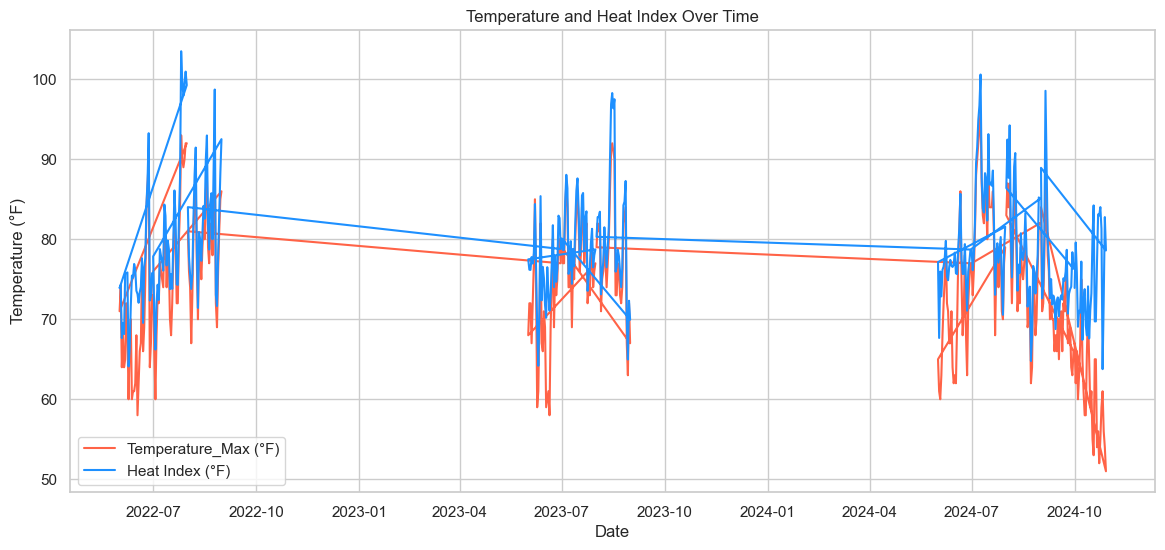

/var/folders/vt/sh1w0qx55718yjkl1r0gcvxw0000gn/T/ipykernel_32733/2091690974.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Temp_Category'], palette="viridis")  # Plot the distribution of temperature categories


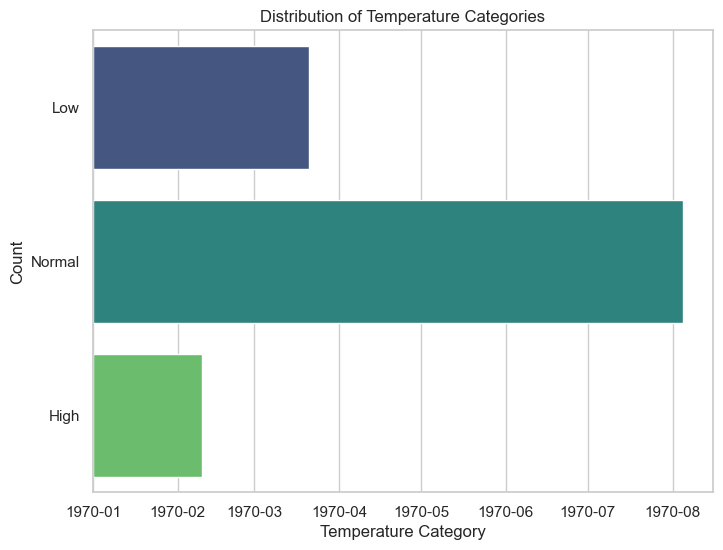

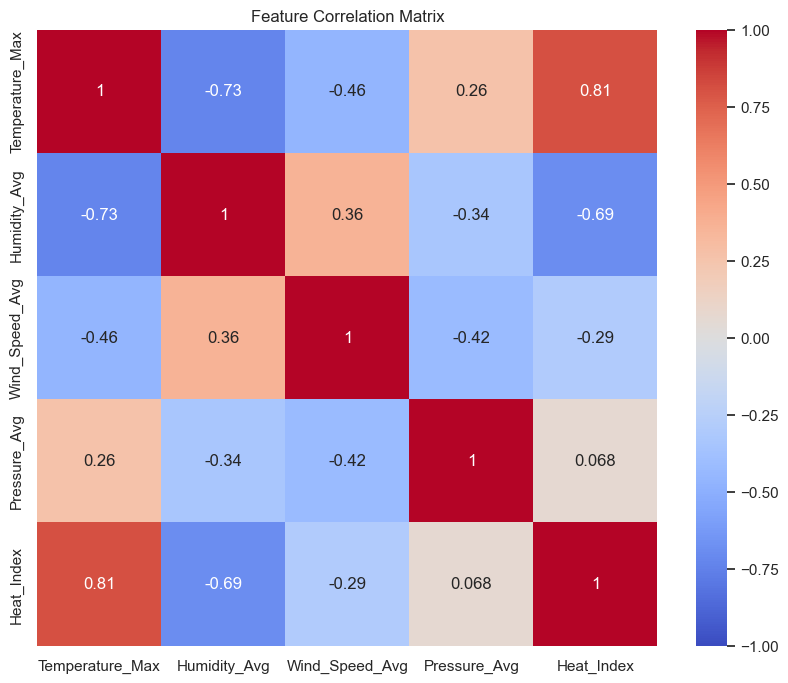

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Temperature and Heat Index Trend Plot
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Temperature_Max'], label='Temperature_Max (°F)', color='tomato')  # Plot max temperature in red
plt.plot(data.index, data['Heat_Index'], label='Heat Index (°F)', color='dodgerblue')  # Plot heat index in blue
plt.xlabel("Date")  # Label x-axis as "Date"
plt.ylabel("Temperature (°F)")  # Label y-axis as "Temperature (°F)"
plt.title("Temperature and Heat Index Over Time")  # Title of the plot
plt.legend()  # Display legend to distinguish between Temperature_Max and Heat Index
plt.show()

# 2. Temperature Category Distribution Bar Plot
plt.figure(figsize=(8, 6))  # Set figure size for the bar plot
sns.countplot(data['Temp_Category'], palette="viridis")  # Plot the distribution of temperature categories
plt.xlabel("Temperature Category")  # Label x-axis as "Temperature Category"
plt.ylabel("Count")  # Label y-axis as "Count"
plt.title("Distribution of Temperature Categories")  # Title of the plot
plt.show()

# 3. Feature Correlation Heatmap
plt.figure(figsize=(10, 8))  # Define figure size for the heatmap
# Compute the correlation matrix for selected features
correlation_matrix = data[['Temperature_Max', 'Humidity_Avg', 'Wind_Speed_Avg', 'Pressure_Avg', 'Heat_Index']].corr()
# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)  # Display correlations from -1 to 1
plt.title("Feature Correlation Matrix")  # Title of the heatmap
plt.show()
